In [ ]:
# ADD YOUR PROJECT PATH HERE (Path to the folder containing the data .csv files)
# Example: YOUR_PROJECT_PATH = '/Users/username/Projects/RunQL/data'
RunQL_path = YOUR_PROJECT_PATH

# initializing

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.metrics.distance import edit_distance

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
companies_data = pd.read_csv(RunQL_path + '/companies.csv')
dealInvestor_data = pd.read_csv(RunQL_path + '/dealInvestor.csv')
deals_data = pd.read_csv(RunQL_path + '/deals.csv')
ecosystems_data = pd.read_csv(RunQL_path + '/ecosystems.csv')
investors_data = pd.read_csv(RunQL_path + '/investors.csv')

# Data Cleaning

## Deals Data Cleaning

#### normal Data Cleaning

In [ ]:
deals_data = deals_data.dropna(subset=['primaryTag'])
deals_data['primaryTag'] = deals_data['primaryTag'].str.lower()
deals_data['primaryTag'] = deals_data['primaryTag'].str.strip()
deals_data.primaryTag.unique()

array(['eCommerce', 'AI', 'CleanTech', 'NanoTech', 'MarTech', 'AdTech',
       'SaaS', 'EdTech', 'FinTech', 'BioTech', 'Quantum', 'AgrTech',
       'Cybersecurity', 'Marketplace', 'CyberSecurity', 'Wearables',
       'Robotics', 'AgTech', 'TravelTech', 'Hardware', 'PropertyTech',
       'HealthTech', 'ioT', 'AutoTech', 'FitnessTech', 'LogisticsTech',
       'Analytics', 'Networks', 'Blockchain', 'HRTech', 'AR', 'FoodTech',
       '3DTech', 'TransportationTech', 'Data', 'Platform', 'InsurTech',
       'iOT', 'GreenTech', 'LegalTech', 'RetailTech', 'Games', 'DevTech',
       'GeoTech', 'GovTech', 'eSports', 'Consumer', 'Social',
       'Pharmaceutical', 'Cryptocurrency', 'HCI', 'Aerospace', 'PetTech',
       'Blochchain', 'Media', 'agTech', 'CrowdFunding', 'BlockChain',
       'SpaceTech', 'healthTech', 'Misc', 'VR', 'Biometrics',
       'EntertainmentTech', 'BatteryTech', 'SocialTech', 'PaaS',
       'Fintech', 'SportsTech', 'HeatlhTech', 'VideoTech', 'Metaverse',
       'SalesTech', 'C

In [ ]:
deals_data['ecosystemName'] = deals_data['ecosystemName'].replace('Waterloo', 'Waterloo Region')
deals_data.ecosystemName.unique()

In [ ]:
# Assuming deals_data is your DataFrame and 'primaryTag' is the column
unique_tags = deals_data['primaryTag'].unique()
tag_mapping = {}

for i, tag1 in enumerate(unique_tags):
  if tag1 in tag_mapping:
    continue  # Skip already mapped tags

  tag_mapping[tag1] = tag1  # Initialize mapping with itself
  for tag2 in unique_tags[i+1:]:
    if tag2 not in tag_mapping: # check if the tag has been assigned to a primaryTag
      if (edit_distance(tag1, tag2) <= 2 and len(tag1) >= 10) or (edit_distance(tag1, tag2) <= 1 and len(tag1) >= 8):
        tag_mapping[tag2] = tag_mapping[tag1] # assign tag2 to tag1

deals_data['mapped_primaryTag'] = deals_data['primaryTag'].map(tag_mapping)
print(deals_data[['primaryTag', 'mapped_primaryTag']])


       primaryTag mapped_primaryTag
0       ecommerce         ecommerce
1              ai                ai
2       cleantech         cleantech
3        nanotech          nanotech
4         martech           martech
...           ...               ...
2744         saas              saas
2745  marketplace       marketplace
2746    cleantech         cleantech
2747  marketplace       marketplace
2748    insurtech         insurtech

[2748 rows x 2 columns]


In [ ]:
deals_data['primaryTag'] = deals_data['mapped_primaryTag']
deals_data.drop(columns=['mapped_primaryTag'], inplace=True)
deals_data.head()

,id,companyId,companyName,headquarters,ecosystemName,ecosystemSecondary,primaryTag,leadInvestors,investors,roundType,date,amount,year,yearQuarter
0,1,677,Verda,Kitchener,Waterloo Region,NaN,ecommerce,Chicago ArchAngels,"Chicago ArchAngels, Corbin Kempenaar",Pre-Seed,2019-01-01,420000,2019,2019 Q1
1,2,134,ClearVoxel,Waterloo,Waterloo Region,NaN,ai,NaN,NaN,Seed,2019-01-01,50000,2019,2019 Q1
2,3,459,Ostara,British Columbia,British Columbia,NaN,cleantech,NaN,NaN,Series ?,2019-01-03,14595900,2019,2019 Q1
3,4,218,Evercloak,Waterloo,Waterloo Region,NaN,nanotech,NaN,NaN,Seed,2019-01-07,125000,2019,2019 Q1
4,5,654,Trufan,Toronto,Toronto,NaN,martech,NaN,NaN,Pre-Seed,2019-01-09,199035,2019,2019 Q1


#### Sector grouping

In [ ]:
# @title sector groups

# sector groups definition


sectorGroup = {
    'Technology and Software': [
       'SaaS', 'Quantum', 'Wearables', 'Robotics', 'Metaverse', 'ioT', 'Networks', 'blockchain', 'HRTech', 'AR', 'Electronics', 'BatteryTech',
        '3DTech', 'Platform', 'PaaS', 'DevTech', 'GeoTech', 'Hardware', 'Application Software', 'API', 'Enterprise Software',
      'HCI', 'VR', 'Biometrics', 'VisionTech', 'DisplayTech', 'NoCode',
        '3D Printing', 'Software Development', 'Computers and Electronics Manu', 'Desktop Computing Software Pro', 'Imaging'],
    'Data and Information System': [
       'AI',  'Analytics', 'Data', 'Cloud Computing', 'Machine Learning', 'Artificial Intelligences', 'information technology',
        'Email', 'GeoSpatial', 'data analysis', 'information technology , Trade', 'Technology, Information, Inter', 'Technology, Information and In'
    ],
    'Health and Biotech': [
        'BioTech', 'Pharmaceutical', 'Medical', 'Health Care Services', 'Electronic Health Record (EHR)', 'Health Diagnostics', 'Hospitals and Health Care',
        'MedTech', 'HealthTech', 'Pharmaceutical Manufacturing', 'Medical Device', 'Medical Equipment Manufacturin', 'Biotechnology Research',
        'Biotechnology', 'Womens Health', 'WellnessTech'
    ],
    'Finance, Business, and Marketing': [
        'FinTech', 'InsurTech', 'Cryptocurrency', 'B2B', 'Payments', 'Marketing', 'Recruiting', 'Career Planning', 'Billing', 'eCommerce', 'Marketplace', 'SalesTech', 'CRM', 'RetailTech', 'DeFi', 'ERP', 'financial services', 'insurance software', 'Retail', 'MarTech', 'Consumer', 'CrowdFunding', 'retail recyclable materials &'
    ],
    'Environment and Agriculture': [
        'CleanTech', 'AgrTech', 'agTech', 'GreenTech', 'Environmental', 'Energy Efficiency', 'Renewable Energy', 'Mining Technology',
        'Environmental Services', 'Animal Feed Manufacturing', 'Chemical Raw Materials Manufac', 'ag-tech', 'FoodTech'
    ],
    'Media, Communications, and Entertainment': [
        'Media', 'eSports', 'Online Audio and Video Media', 'VideoTech', 'Mobile', 'AudioTech', 'Telecommunications', 'Communications Infrastructure', 'eLearning', 'Social', 'EntertainmentTech', 'SocialTech', 'Games'
    ],
    'Services and Security': [
        'Cybersecurity', 'Security and Investigations', 'GovTech', 'LegalTech', 'Consulting', 'R&D', 'FitnessTech', 'EdTech'
    ],
    'Engineering, and Construction': [
        'Civil Engineering', 'ContructionTech', 'Construction Software', 'Automation Machinery Manufactu', 'Manufacturing',
        'Industrial Automation', 'Industrial Machinery Manufactu', 'Real Estate', 'Automotive', 'PropertyTech'
    ],
    'Travel and Logistics': [
        'LogisticsTech', 'TransportationTech', 'Last Mile Transportation', 'Maritime Transportation', 'Rail Transportation', 'AutoTech',
        'Logistics', 'TravelTech', 'Aerospace', 'SpaceTech'
    ],
    'Others': [
        'Misc', 'NanoTech', 'AdTech', 'PetTech', 'SportsTech', 'Electrochromic', 'Esphera SynBio'
    ]
}

In [ ]:
# prompt: lowercase every list in the values of sectorGroup

sectorGroup_lower = {}
for key, value in sectorGroup.items():
  sectorGroup_lower[key] = [x.lower() for x in value]
sectorGroup = sectorGroup_lower


In [ ]:
# prompt: concatenate all values in sectorGroup together

all_sectors = []
for sector_list in sectorGroup.values():
  all_sectors.extend(sector_list)

all_sectors.sort()
all_sectors[:10]

['3d printing',
 '3dtech',
 'adtech',
 'aerospace',
 'ag-tech',
 'agrtech',
 'agtech',
 'ai',
 'analytics',
 'animal feed manufacturing',
 'api',
 'application software',
 'ar',
 'artificial intelligences',
 'audiotech',
 'automation machinery manufactu',
 'automotive',
 'autotech',
 'b2b',
 'batterytech',
 'billing',
 'biometrics',
 'biotech',
 'biotechnology',
 'biotechnology research',
 'blockchain',
 'career planning',
 'chemical raw materials manufac',
 'civil engineering',
 'cleantech',
 'cloud computing',
 'communications infrastructure',
 'computers and electronics manu',
 'construction software',
 'consulting',
 'consumer',
 'contructiontech',
 'crm',
 'crowdfunding',
 'cryptocurrency',
 'cybersecurity',
 'data',
 'data analysis',
 'defi',
 'desktop computing software pro',
 'devtech',
 'displaytech',
 'ecommerce',
 'edtech',
 'elearning',
 'electrochromic',
 'electronic health record (ehr)',
 'electronics',
 'email',
 'energy efficiency',
 'enterprise software',
 'entertainme

In [ ]:
# Assuming 'deals_data' is your DataFrame with a 'primaryTag' column
def assign_group(primary_tag):
    for group, tags in sectorGroup.items():
        if primary_tag in tags:
            return group
    return 'Others'  # Default group in case primaryTag is not found

# Create a new 'group' column in your DataFrame
deals_data['group'] = deals_data['primaryTag'].apply(assign_group)

# Now your DataFrame is grouped by the new 'group' column
deals_data.head()

,id,companyId,companyName,headquarters,ecosystemName,ecosystemSecondary,primaryTag,leadInvestors,investors,roundType,date,amount,year,yearQuarter,group
0,1,677,Verda,Kitchener,Waterloo Region,NaN,ecommerce,Chicago ArchAngels,"Chicago ArchAngels, Corbin Kempenaar",Pre-Seed,2019-01-01,420000,2019,2019 Q1,"Finance, Business, and Marketing"
1,2,134,ClearVoxel,Waterloo,Waterloo Region,NaN,ai,NaN,NaN,Seed,2019-01-01,50000,2019,2019 Q1,Data and Information System
2,3,459,Ostara,British Columbia,British Columbia,NaN,cleantech,NaN,NaN,Series ?,2019-01-03,14595900,2019,2019 Q1,Environment and Agriculture
3,4,218,Evercloak,Waterloo,Waterloo Region,NaN,nanotech,NaN,NaN,Seed,2019-01-07,125000,2019,2019 Q1,Others
4,5,654,Trufan,Toronto,Toronto,NaN,martech,NaN,NaN,Pre-Seed,2019-01-09,199035,2019,2019 Q1,"Finance, Business, and Marketing"


# Section 1 : Investment Trends Over Time

## Analyze total tech investment per year (2019-2024), identifying major shifts.

In [ ]:
# prompt: Using dataframe deals_data: transform the dataframe into a new dataframe with each year as row, each primaryTag as columns, and each entries be the sum of the 'amount' column from the year and primaryTag
transformed_df = pd.pivot_table(deals_data, values='amount', index='year', columns='group', aggfunc='sum', fill_value=0)
transformed_df.index.name = 'year'
transformed_df.reset_index(inplace=True)
transformed_df


group,year,Data and Information System,"Engineering, and Construction",Environment and Agriculture,"Finance, Business, and Marketing",Health and Biotech,"Media, Communications, and Entertainment",Others,Services and Security,Technology and Software,Travel and Logistics
0,2019,427592650,48518336,407317350,1534234068,730133048,58094529,23758388,473341670,1224018484,47954139
1,2020,371015653,139201064,197863317,1272922374,995137447,20150745,28108519,279436616,763211751,287567350
2,2021,1414191771,80050029,744241794,4180964929,1407683026,31366337,87010541,1207716703,4102980030,769848236
3,2022,585903887,240662890,1091408072,2598692677,724865345,43477270,122915740,1498722070,2585219534,257424956
4,2023,1255038071,125211292,887907149,874355338,927896410,72500000,50000000,222536297,1128122915,199178800
5,2024,1785016213,140140350,779143288,1818719202,700910995,45717550,39271840,153370075,3214359763,405024000
6,2025,24500000,0,52800000,100450000,240300009,0,237880000,0,102300000,3000000


In [ ]:
# Assuming transformed_df is already defined as in the original code

# Divide the amount by 10^9
transformed_df_billion = transformed_df.copy()
for col in transformed_df_billion.columns:
    if col != 'year':
        transformed_df_billion[col] = transformed_df_billion[col] / 1e9

# Reshape the dataframe from wide to long format
transformed_df_long_billion = pd.melt(transformed_df_billion, id_vars=['year'], var_name='primaryTag', value_name='amount')

# Create the bar chart with increased size and adjusted y-axis label
chart = alt.Chart(transformed_df_long_billion).mark_bar().encode(
    x=alt.X('year:O', sort='ascending', title='Year'),
    y=alt.Y('amount:Q', sort='ascending', title='Amount (Billions USD)'),
    color='primaryTag:N',
    tooltip=['year', 'primaryTag', 'amount']
).properties(
    title='Investment Trends Over Time (Billions USD)',
    width=600,  # Adjust width
    height=400  # Adjust height
)

chart


alt.Chart(...)

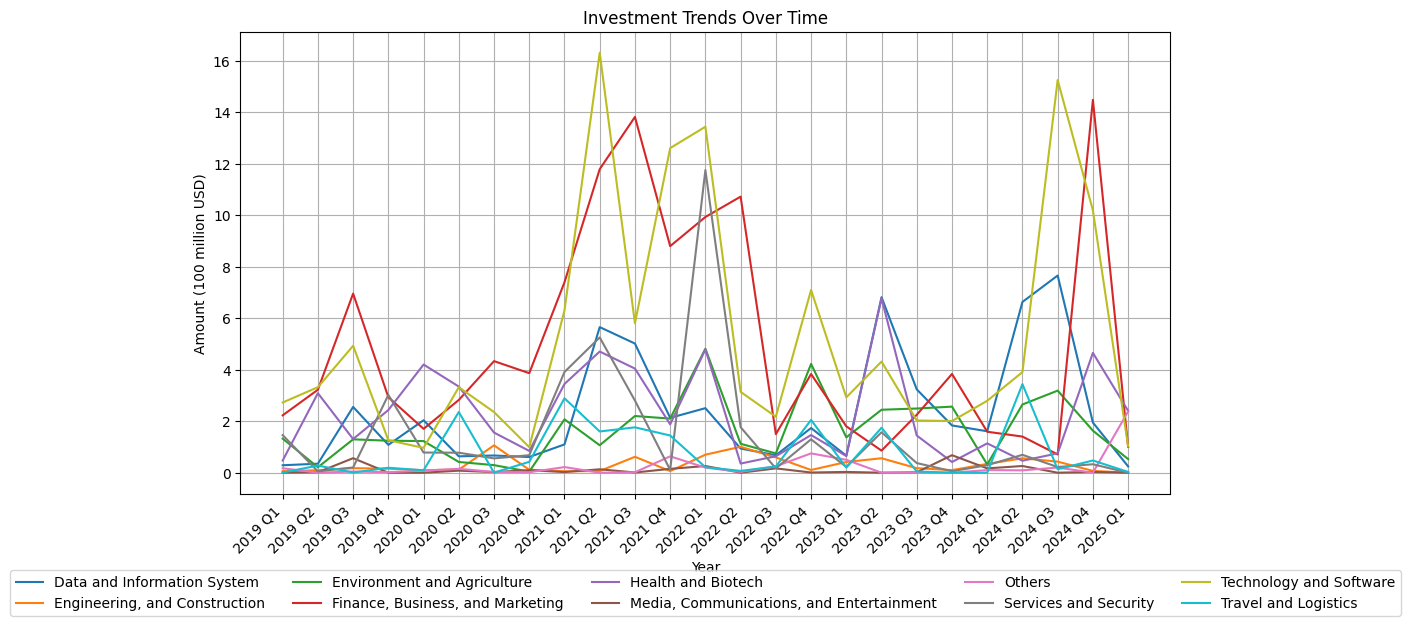

In [ ]:
# Assuming transformed_df is already defined as in the original code

plt.figure(figsize=(12, 6))
for column in transformed_df.columns:
    if column != 'year':  # Skip the 'year' column
        plt.plot(transformed_df['year'], transformed_df[column]/10**8, label=column)

plt.xlabel('Year')
plt.ylabel('Amount (100 million USD)')
plt.title('Investment Trends Over Time')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5) #Move legend to bottom
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


 ## Examine deal volume and funding size trends over time.

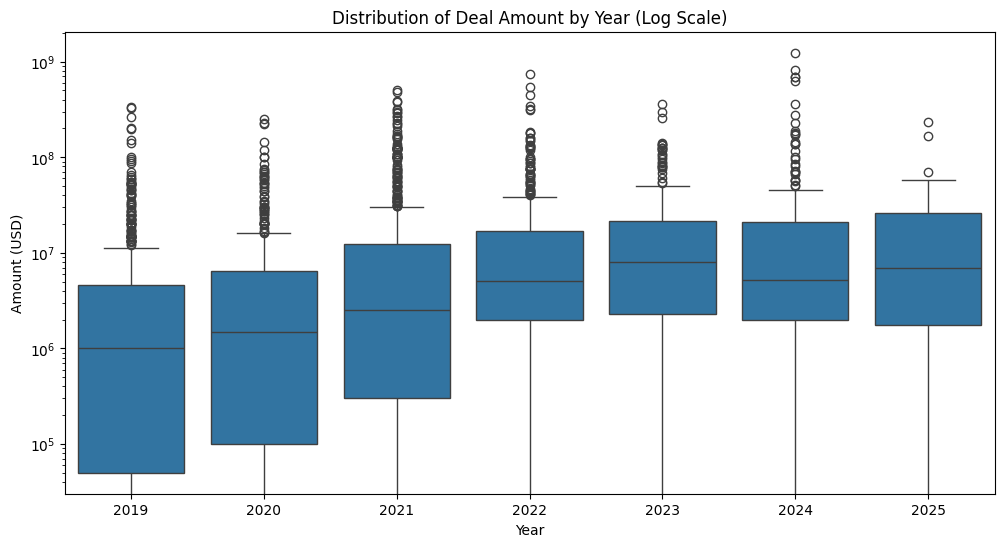

In [ ]:
# create box plots to show the distribution of amount (log scale) in each year

# Assuming 'deals_data' DataFrame is already loaded

# Convert 'amount' column to numeric, handling potential errors
deals_data['amount'] = pd.to_numeric(deals_data['amount'], errors='coerce')

# Filter out rows with missing 'amount' values
deals_data = deals_data.dropna(subset=['amount'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='amount', data=deals_data[['year','amount']])
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Amount (USD)')
plt.title('Distribution of Deal Amount by Year (Log Scale)')
plt.show()


## Investigate how investment has changed across different deal sizes (e.g., <$100K, $1M-$5M, $100M+).

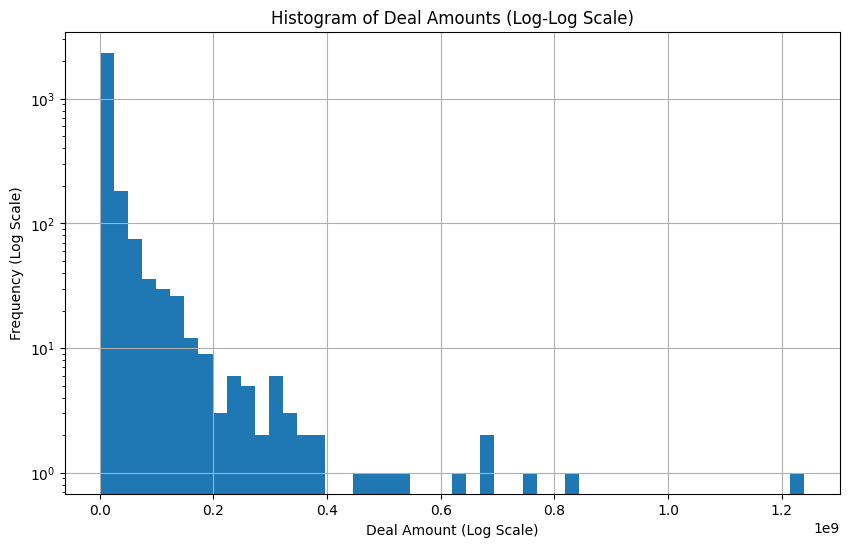

In [ ]:
# Assuming 'deals_data' DataFrame is already loaded and 'amount' column is numeric

# Create the histogram with log scales
plt.figure(figsize=(10, 6))
plt.hist(deals_data['amount'], bins=50, log=True)  # Use log=True for log scale on y-axis
#plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Deal Amount (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Deal Amounts (Log-Log Scale)')
plt.grid(True)
plt.show()


In [ ]:
# Group Deals into Deal_amount_group
# Define the bins for grouping
bins = [0, 1e5, 1e6, 5e6, 1e7, 1e8, float('inf')]
labels = ['< 100k', '100k - 1M', '1M-5M', '5M-10M', '10M-100M', '> 100M']

# Create a new column 'amount_group' based on the bins and labels
deals_data['amount_group'] = pd.cut(deals_data['amount'], bins=bins, labels=labels, right=False)

# Group by the 'amount_group' column and perform any aggregation or analysis
grouped_deals = deals_data.groupby('amount_group')

# Example: Calculate the count of deals in each group
deal_counts = grouped_deals.size()
print(deal_counts)

# Example: Calculate the sum of amounts in each group
amount_sums = grouped_deals['amount'].mean()
amount_sums


amount_group
< 100k       465
100k - 1M    387
1M-5M        809
5M-10M       325
10M-100M     646
> 100M       116
dtype: int64


<ipython-input-30-fd3fab4ae08e>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_deals = deals_data.groupby('amount_group')


,amount
amount_group,
< 100k,8.483755e+03
100k - 1M,3.917011e+05
1M-5M,2.421128e+06
5M-10M,6.870874e+06
10M-100M,2.948044e+07
> 100M,2.180944e+08


<ipython-input-47-565cc825088f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deals_by_year_amount = deals_data.groupby(['yearQuarter', 'amount_group']).size().unstack(fill_value=0)


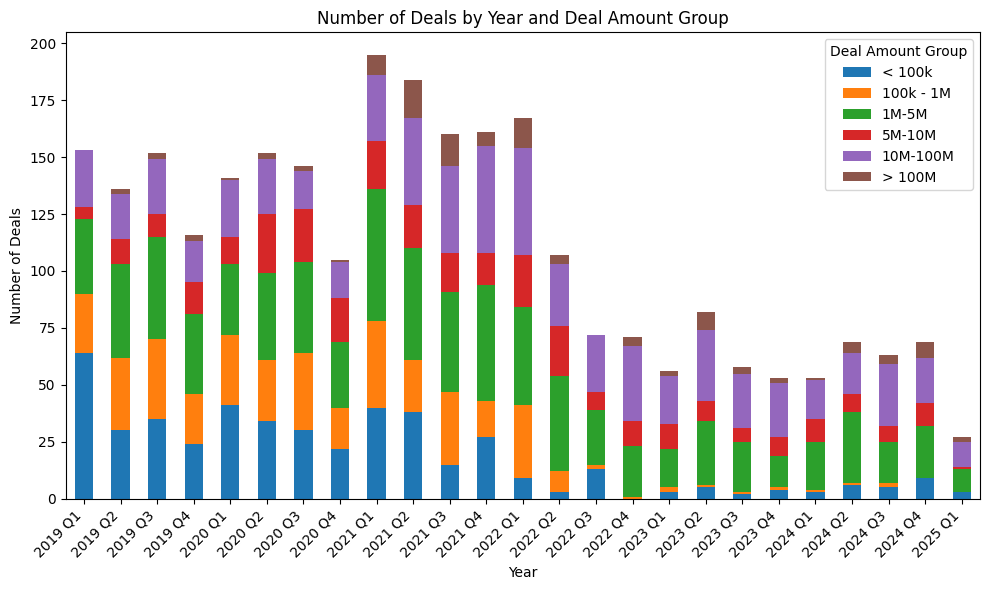

In [ ]:
# create stacked bar chart to show the number of deals from each deal amount group in each year.

# Assuming 'deals_data' and 'bins', 'labels' are defined as in the previous code

# Group by year and amount_group, then count the number of deals
deals_by_year_amount = deals_data.groupby(['yearQuarter', 'amount_group']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
deals_by_year_amount.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.title('Number of Deals by Year and Deal Amount Group')
plt.legend(title='Deal Amount Group')
plt.xticks(rotation=45, ha = 'right')  # Keep x-axis labels horizontal
plt.tight_layout()


<ipython-input-56-e68050cea6a8>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = deals_data.groupby(['year', 'group', 'amount_group']).size().unstack(fill_value=0)


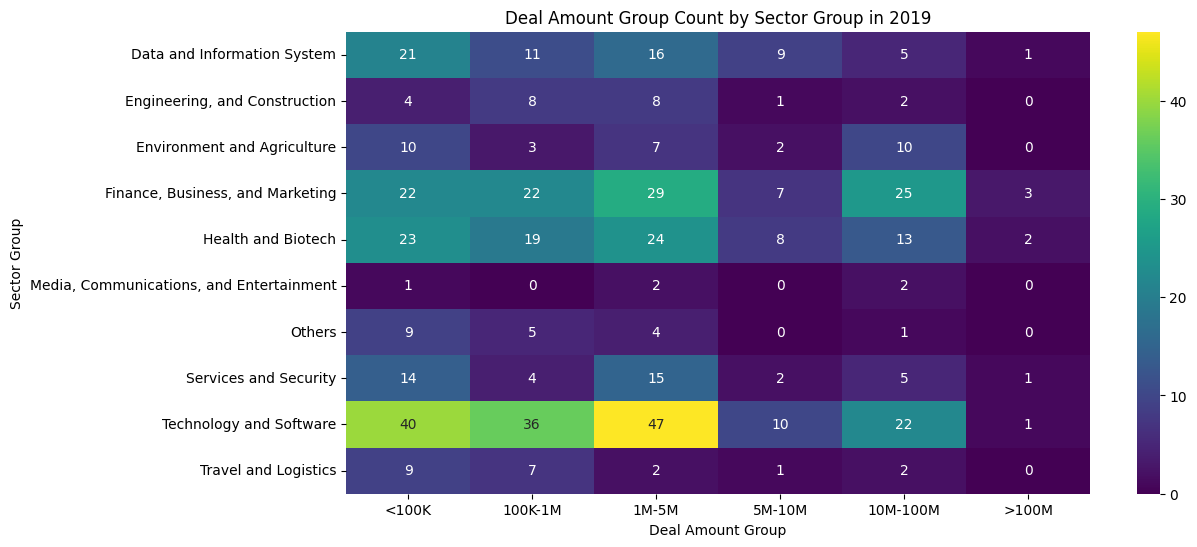

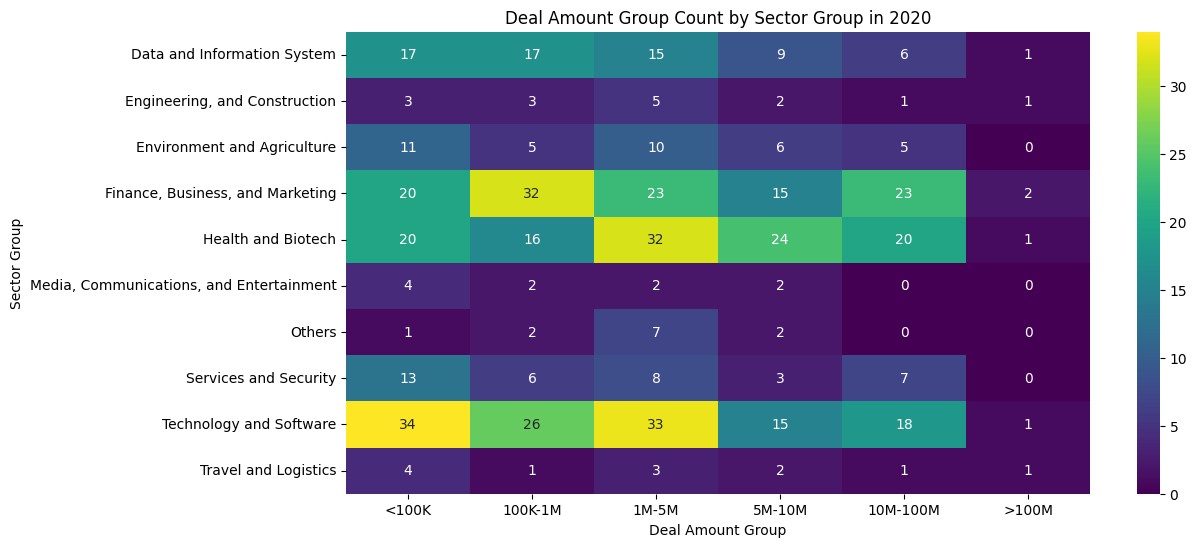

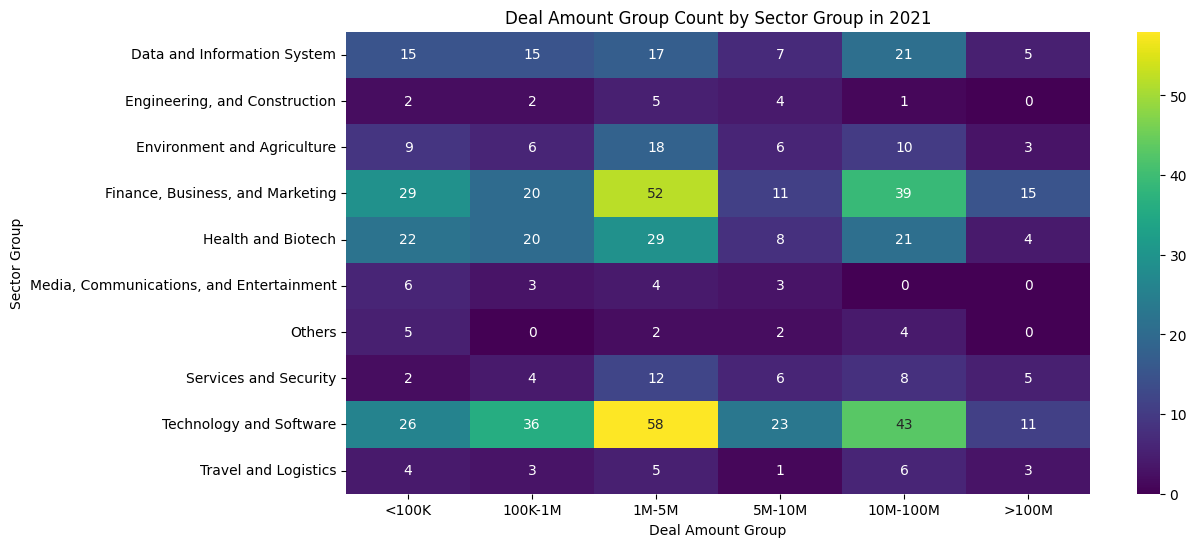

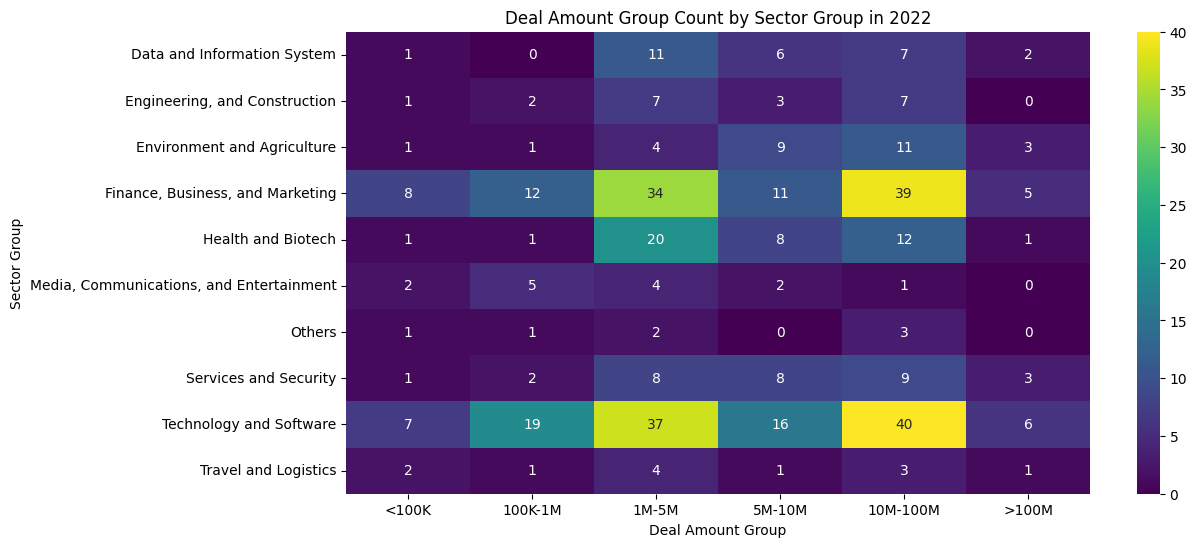

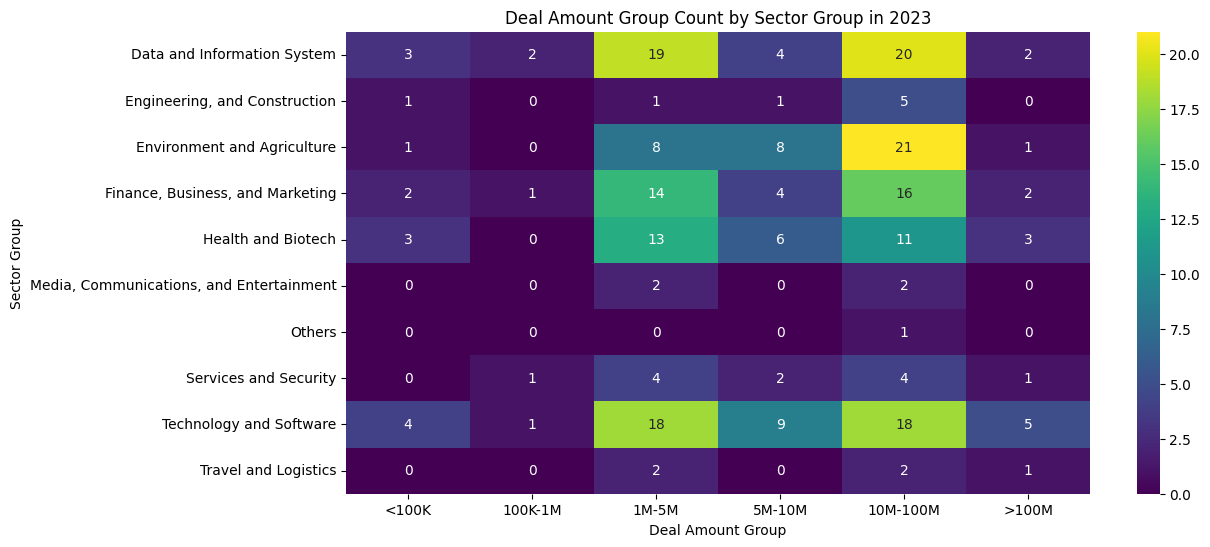

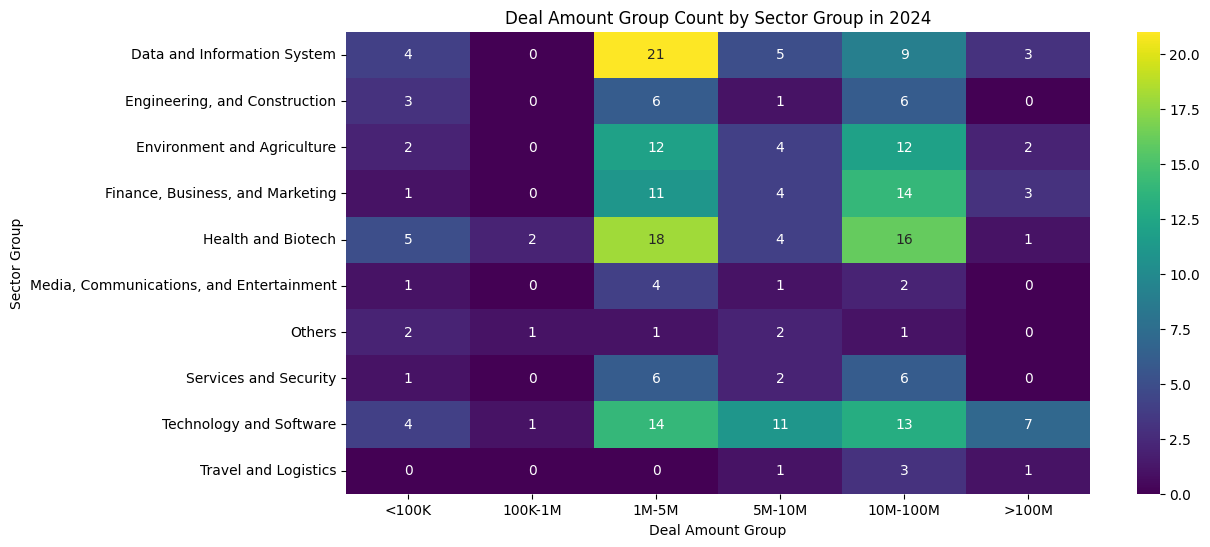

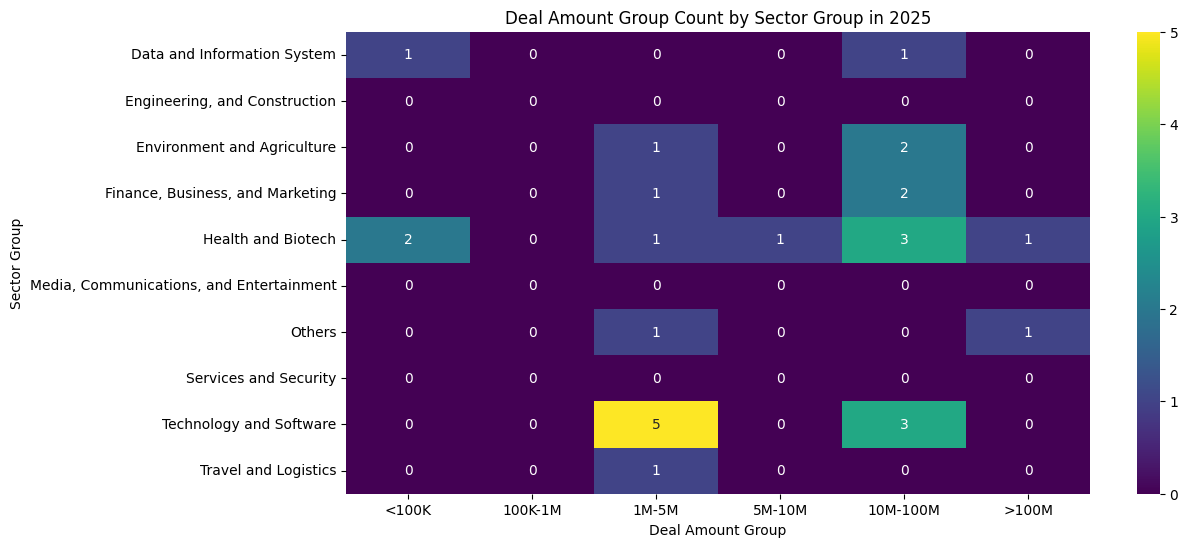

In [ ]:
# create 1 heat map for each year showing the count of each deal amount group for each deal sector group.

# Create the 'group' column if it doesn't exist
if 'group' not in deals_data.columns:
    deals_data['group'] = deals_data['primaryTag'].apply(assign_group)

# Define bins for deal amount groups
bins = [0, 1e5, 1e6, 5e6, 1e7, 1e8, float('inf')]
labels = ['<100K', '100K-1M', '1M-5M', '5M-10M', '10M-100M', '>100M']
deals_data['amount_group'] = pd.cut(deals_data['amount'], bins=bins, labels=labels, right=False)

# Group data by year, sector group, and deal amount group, then calculate percentages
grouped = deals_data.groupby(['year', 'group', 'amount_group']).size().unstack(fill_value=0)

# Calculate the total number of deals for each year and sector group
grouped_total = deals_data.groupby(['year', 'group']).size()


# Loop through each year
for year in grouped.index.get_level_values('year').unique():
    # Get data for the current year
    year_data = grouped.loc[year]

    # Calculate percentages
    #year_data = year_data.div(year_data.sum(axis=1), axis=0) * 100

    # Create the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(year_data, annot=True, cmap='viridis')
    plt.title(f'Deal Amount Group Count by Sector Group in {year}')
    plt.xlabel('Deal Amount Group')
    plt.ylabel('Sector Group')
    plt.show()


# Section 4 : Sectoral & Regional Insights

## Identify the top investment categories nationally (e.g., SaaS, FinTech, HealthTech, AI, Blockchain).

In [ ]:
# Calculate sum and mean of 'amount' for each 'primaryTag'
amount_stats_by_tags = deals_data.groupby('primaryTag')['amount'].agg(['sum', 'mean','count'])

amount_stats_by_tags


,sum,mean,count
primaryTag,,,
3d printing,500000,5.000000e+05,1
3dtech,151674686,1.263956e+07,12
adtech,274125224,1.246024e+07,22
aerospace,0,0.000000e+00,2
ag-tech,8800000,8.800000e+06,1
...,...,...,...
visiontech,4690000,4.690000e+06,1
vr,1984290,1.984290e+06,1
wearables,75242400,7.524240e+06,10


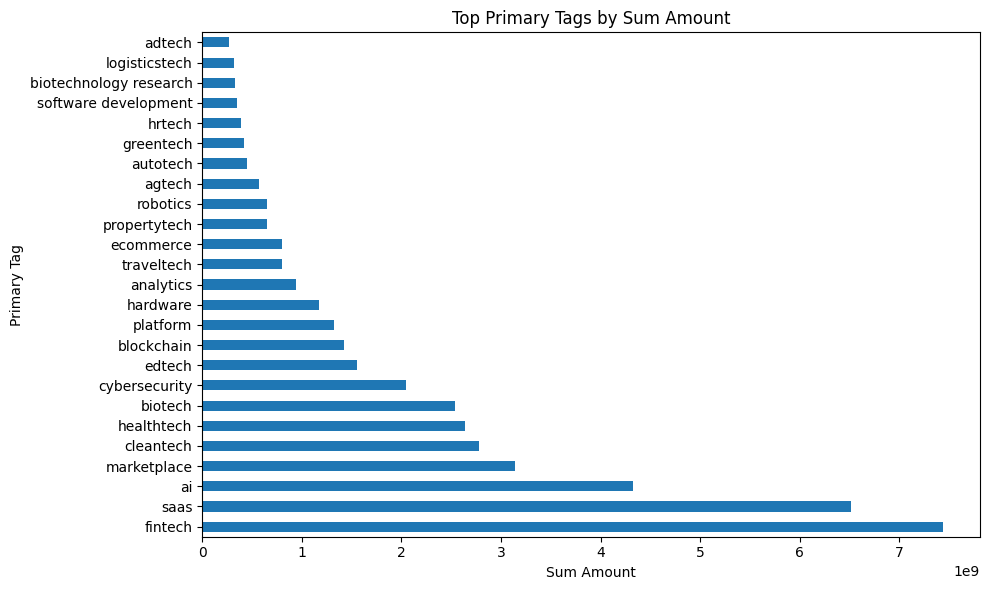

In [ ]:
# Group by 'primaryTag' and sum the 'amount'
top_tags_by_amount = amount_stats_by_tags['sum'].sort_values(ascending=False).head(25)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
top_tags_by_amount.plot(kind='barh')
plt.xlabel('Sum Amount')
plt.ylabel('Primary Tag')
plt.title('Top Primary Tags by Sum Amount')
plt.tight_layout()
plt.show()


In [ ]:
amount_stats_by_sector_group = deals_data.groupby('group')['amount'].agg(['sum', 'mean','count'])

amount_stats_by_sector_group

,sum,mean,count
group,,,
Data and Information System,5863258245,1.782145e+07,329
"Engineering, and Construction",773783961,8.060250e+06,96
Environment and Agriculture,4160680970,1.857447e+07,224
"Finance, Business, and Marketing",12380338588,2.160618e+07,573
Health and Biotech,5726926280,1.304539e+07,439
"Media, Communications, and Entertainment",271306431,4.759762e+06,57
Others,588945028,9.654837e+06,61
Services and Security,3835123431,2.216834e+07,173
Technology and Software,13120212477,1.827328e+07,718


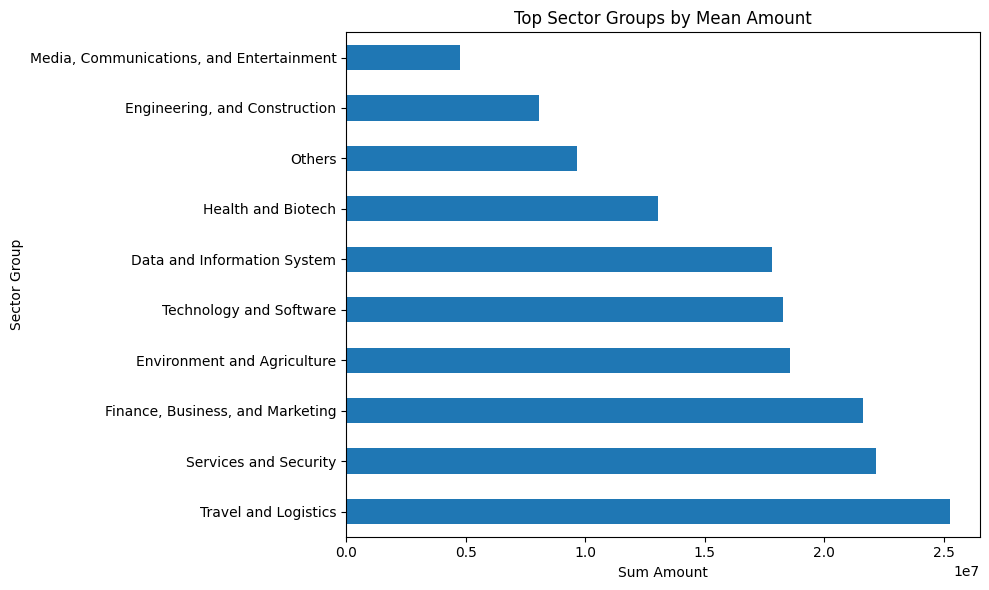

In [ ]:
# Group by 'primaryTag' and sum the 'amount'
top_sector_group_by_amount = amount_stats_by_sector_group['mean'].sort_values(ascending=False).head(25)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
top_sector_group_by_amount.plot(kind='barh')
plt.xlabel('Sum Amount')
plt.ylabel('Sector Group')
plt.title('Top Sector Groups by Mean Amount')
plt.tight_layout()
plt.show()


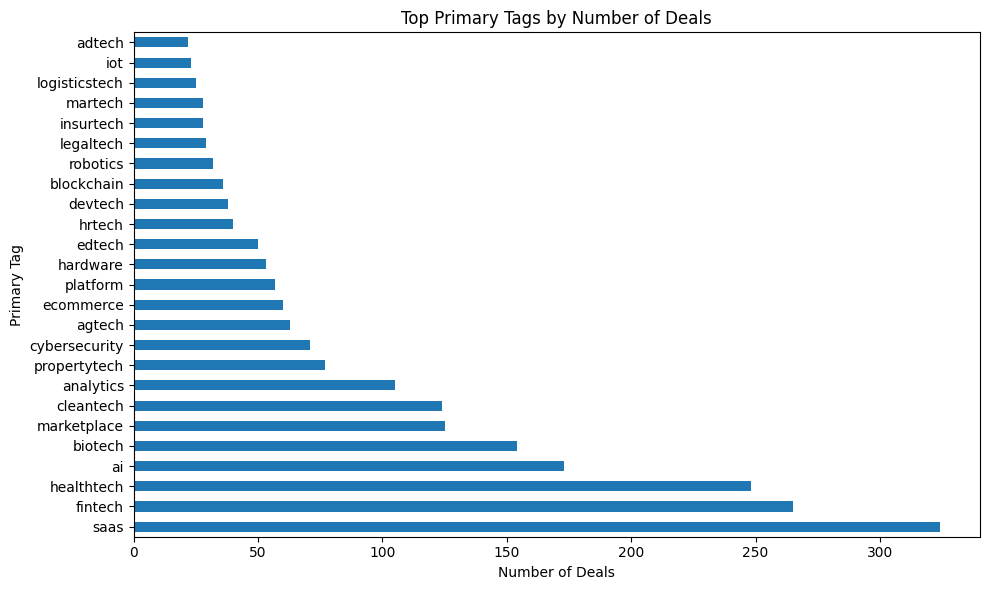

In [ ]:
# Group by 'primaryTag' and count the number of deals
top_tags_by_deal_count = amount_stats_by_tags['count'].sort_values(ascending=False).head(25)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
top_tags_by_deal_count.plot(kind='barh')
plt.xlabel('Number of Deals')
plt.ylabel('Primary Tag')
plt.title('Top Primary Tags by Number of Deals')
plt.tight_layout()
plt.show()


## Compare investment trends across key Canadian regions (Toronto, Vancouver, Montreal, Calgary, Waterloo, etc.).

In [ ]:
amount_stats_by_ecosystem = deals_data.groupby('ecosystemName')['amount'].agg(['sum', 'mean','count'])

amount_stats_by_ecosystem

,sum,mean,count
ecosystemName,,,
Alberta,2850004473,1.217951e+07,234
British Columbia,12351271361,2.352623e+07,525
East Coast,601543400,6.399398e+06,94
Other,1006577053,1.037708e+07,97
Ottawa,1388346078,1.446194e+07,96
Quebec,8669873365,1.617514e+07,536
Toronto,17790102624,1.804270e+07,986
Waterloo Region,4032854538,2.240475e+07,180


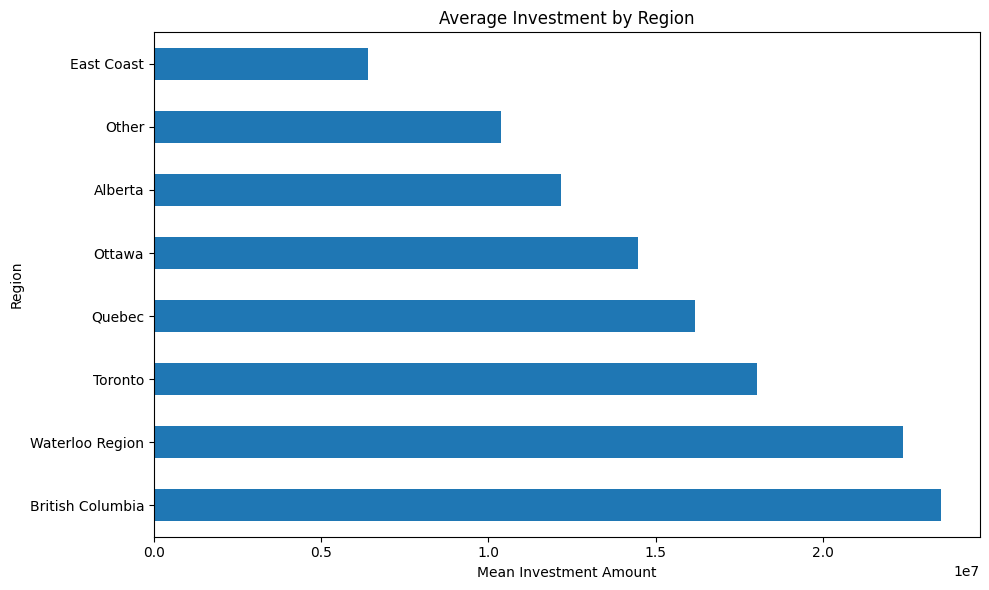

In [ ]:
# prompt: Compare investment trends across ecosystems

import matplotlib.pyplot as plt
# Assuming 'deals_data' DataFrame is already loaded and processed

# Group by 'ecosystemName' and sum the 'amount'
investment_by_region = amount_stats_by_ecosystem['mean'].sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
investment_by_region.plot(kind='barh')
plt.xlabel('Mean Investment Amount')
plt.ylabel('Region')
plt.title('Average Investment by Region')
plt.tight_layout()
plt.show()


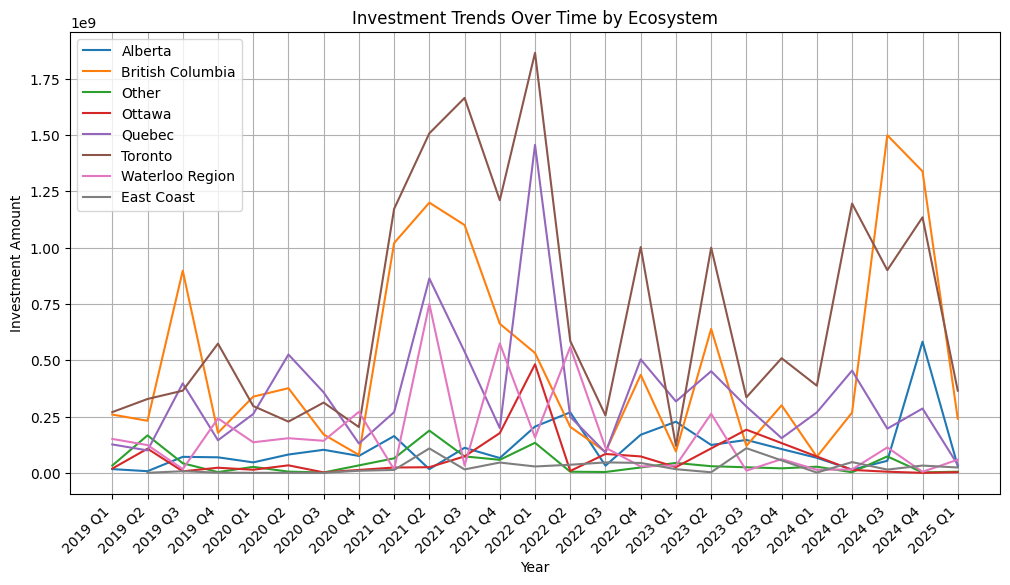

In [ ]:
# Assuming 'deals_data' DataFrame is available and 'amount' column is numeric

# Group the data by year and ecosystem, then calculate the sum of investments
investment_trends = deals_data.groupby(['yearQuarter', 'ecosystemName'])['amount'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
for ecosystem in investment_trends['ecosystemName'].unique():
    ecosystem_data = investment_trends[investment_trends['ecosystemName'] == ecosystem]
    plt.plot(ecosystem_data['yearQuarter'], ecosystem_data['amount'], label=ecosystem)

plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.title('Investment Trends Over Time by Ecosystem')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()


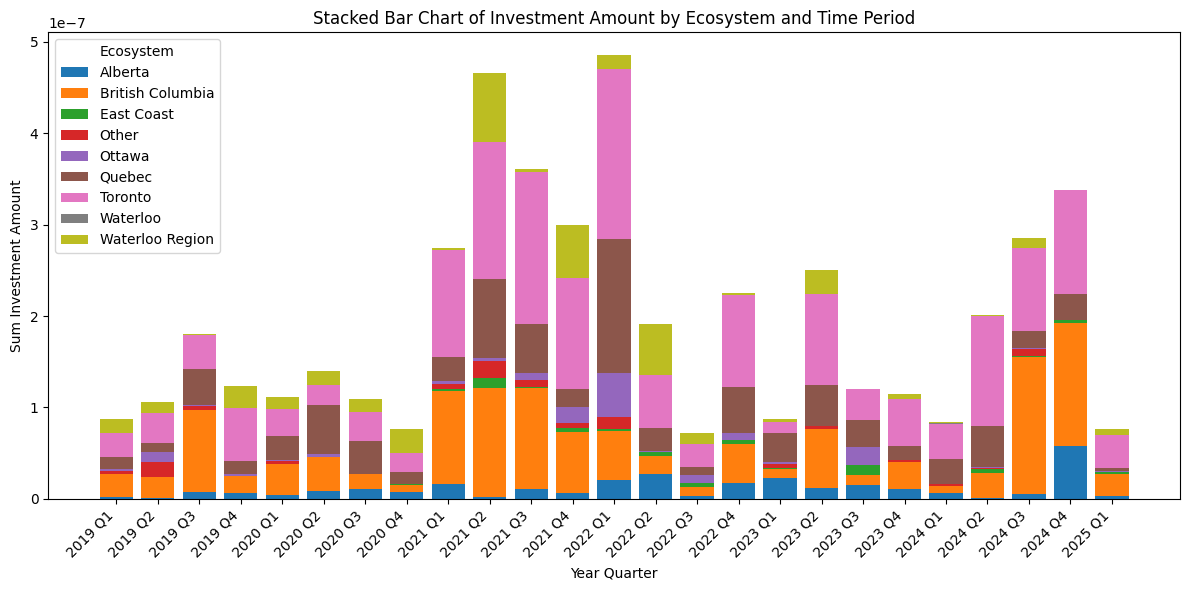

In [ ]:
fig = plt.figure(figsize=(12, 6))
categories = list(investment_trends.index)
bottom = [0] * len(categories)
#investment_trends.plot(kind='bar', stacked=True, figsize=(12, 6))
for i in range(len(investment_trends.columns)):
    plt.bar(categories, investment_trends[investment_trends.columns[i]]/(10**9), bottom=bottom, label=investment_trends.columns[i])
    bottom = [sum(x) for x in zip(bottom, (investment_trends[investment_trends.columns[i]]/(10**9)))]

plt.xlabel('Year Quarter')
plt.ylabel('Sum Investment Amount')
plt.title('Stacked Bar Chart of Investment Amount by Ecosystem and Time Period')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ecosystem')
plt.tight_layout()

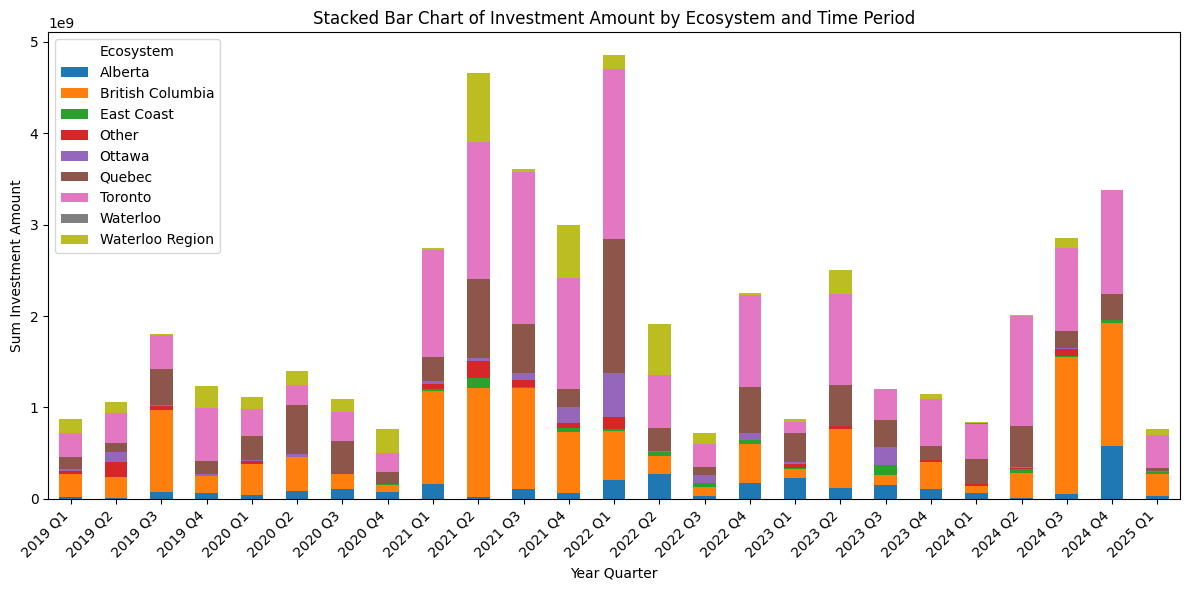

In [ ]:
# Assuming 'deals_data' DataFrame is available and 'amount' column is numeric
# and 'yearQuarter' column represents the time periods (e.g., '2023 Q1')

# Group the data by yearQuarter and ecosystemName, then calculate the sum of investments
investment_trends = deals_data.groupby(['yearQuarter', 'ecosystemName'])['amount'].sum().unstack()

# Create the stacked bar chart
investment_trends.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Year Quarter')
plt.ylabel('Sum Investment Amount')
plt.title('Stacked Bar Chart of Investment Amount by Ecosystem and Time Period')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ecosystem')
plt.tight_layout()
plt.show()


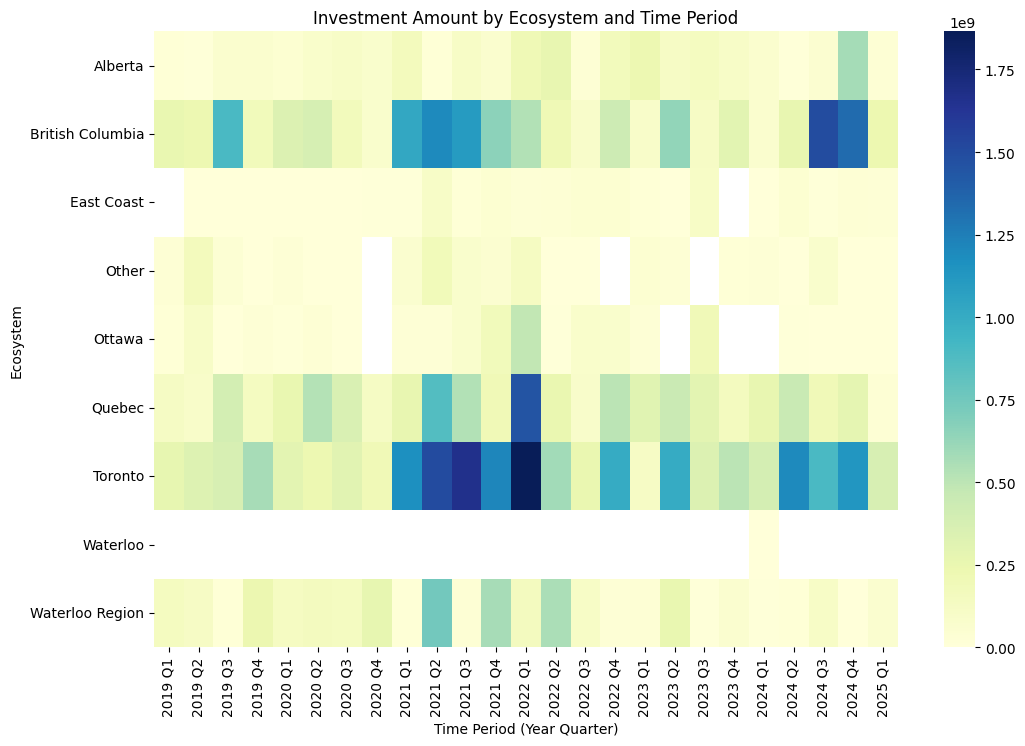

In [104]:
# Assuming 'deals_data' DataFrame is available and processed as in your code
# with 'yearQuarter', 'ecosystemName', and 'amount' columns
# and 'amount_group' column already created

# Pivot the data to create a matrix for the heatmap
heatmap_data = deals_data.pivot_table(index='ecosystemName', columns='yearQuarter', values='amount', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, fmt=".1f", cmap="YlGnBu")  # Adjust fmt and cmap as needed
plt.title('Investment Amount by Ecosystem and Time Period')
plt.xlabel('Time Period (Year Quarter)')
plt.ylabel('Ecosystem')
plt.show()


In [ ]:
# Assuming 'deals_data' DataFrame is available and processed,
# with 'ecosystemName' representing ecosystems and 'group' representing sectors.

# Calculate the total investment for each combination of ecosystem and sector
ecosystem_sector_investment = deals_data.groupby(['ecosystemName', 'group'])['amount'].sum().reset_index()

# Create the treemap
fig = px.treemap(ecosystem_sector_investment,
                 path=['ecosystemName', 'group'],
                 values='amount',
                 title='Ecosystem and Sector Investment Treemap')
fig.show()
